In [1]:
import os
import numpy as np
import pandas as pd
import uproot as ur
import matplotlib.pyplot as plt
import awkward as ak
import vector
import scienceplots
plt.style.use(['science','notebook','grid'])
import time

In [2]:
t1 = time.time()

In [3]:
file = "/home/chandrima/IDM_MuC/Root_files/IDM_sig_OutRoot/IDM_BKG_nunu_out.root"

In [4]:
file1 = ur.open(file)

In [5]:
print(file1.classnames())

{'ProcessID0;1': 'TProcessID', 'ProcessID1;1': 'TProcessID', 'ProcessID2;1': 'TProcessID', 'ProcessID3;1': 'TProcessID', 'ProcessID4;1': 'TProcessID', 'ProcessID5;1': 'TProcessID', 'ProcessID6;1': 'TProcessID', 'ProcessID7;1': 'TProcessID', 'ProcessID8;1': 'TProcessID', 'ProcessID9;1': 'TProcessID', 'ProcessID10;1': 'TProcessID', 'ProcessID11;1': 'TProcessID', 'ProcessID12;1': 'TProcessID', 'ProcessID13;1': 'TProcessID', 'ProcessID14;1': 'TProcessID', 'ProcessID15;1': 'TProcessID', 'ProcessID16;1': 'TProcessID', 'ProcessID17;1': 'TProcessID', 'ProcessID18;1': 'TProcessID', 'ProcessID19;1': 'TProcessID', 'ProcessID20;1': 'TProcessID', 'ProcessID21;1': 'TProcessID', 'ProcessID22;1': 'TProcessID', 'ProcessID23;1': 'TProcessID', 'ProcessID24;1': 'TProcessID', 'ProcessID25;1': 'TProcessID', 'ProcessID26;1': 'TProcessID', 'ProcessID27;1': 'TProcessID', 'ProcessID28;1': 'TProcessID', 'ProcessID29;1': 'TProcessID', 'ProcessID30;1': 'TProcessID', 'ProcessID31;1': 'TProcessID', 'ProcessID32;1': 

In [6]:
# treevent = file1["Delphes;1/"]
# treevent.show()

# DEFINITIONS

In [7]:
def px(pt, phi):
    return pt*(np.cos(phi))
def py(pt, phi):
    return pt*(np.sin(phi))
def pz(pt, m, eta):
    return (np.sqrt(pt**2 + m**2))*np.sinh(eta)
def E(pt, m, eta):
    return (np.sqrt(pt**2 + m**2))*np.cosh(eta)

# JET

In [8]:
tree1 = file1["Delphes;1/VLCjetR05_inclusive.PT"]
tree2 = file1["Delphes;1/VLCjetR05_inclusive.Eta"]
tree3 = file1["Delphes;1/VLCjetR05_inclusive.Phi"]
tree4 = file1["Delphes;1/VLCjetR05_inclusive.Mass"]
tree100 = file1["Delphes;1/VLCjetR05_inclusive.Charge"]

tree1.show()
tree2.show()
tree3.show()
tree4.show()
tree100.show()
a = tree1.arrays()
b = tree2.arrays()
c = tree3.arrays()
d = tree4.arrays()
z = tree100.arrays()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
VLCjetR05_inclusive. | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typen

In [9]:
JPT = a["VLCjetR05_inclusive.PT"]
Jeta = b["VLCjetR05_inclusive.Eta"]
Jphi = c["VLCjetR05_inclusive.Phi"]
Jm = d["VLCjetR05_inclusive.Mass"]
Jch = z["VLCjetR05_inclusive.Charge"]


# Jet Data Frame

In [10]:
pxj = px(JPT,Jphi).tolist()
pyj = py(JPT,Jphi).tolist()
pzj = pz(JPT, Jm, Jeta).tolist()
Ej =  E(JPT, Jm, Jeta).tolist()
jpt = JPT.tolist()
jeta = Jeta.tolist()
jphi = Jphi.tolist()
jm = Jm.tolist()
jch = Jch.tolist()

In [11]:
numj = [len(i) for i in Ej]

In [12]:
data1 = {'jet_num': numj,'jpt':jpt, 'jeta':jeta, 'jphi':jphi,'jm':jm, 'jch':jch, 'pxj':pxj,'pyj':pyj, 'pzj':pzj,'Ej':Ej}

In [13]:
t1 = time.time()

In [14]:
df_jet = pd.DataFrame(data1, index = [i for i in range(len(Ej))])
df_jet.index = range(1, len(df_jet) + 1)
df_jet

,jet_num,jpt,jeta,jphi,jm,jch,pxj,pyj,pzj,Ej
1,0,[],[],[],[],[],[],[],[],[]
2,0,[],[],[],[],[],[],[],[],[]
3,0,[],[],[],[],[],[],[],[],[]
4,0,[],[],[],[],[],[],[],[],[]
5,0,[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...
10410308,0,[],[],[],[],[],[],[],[],[]
10410309,0,[],[],[],[],[],[],[],[],[]
10410310,0,[],[],[],[],[],[],[],[],[]
10410311,0,[],[],[],[],[],[],[],[],[]


In [15]:
t2 = time.time()
print(t2-t1)

16.644492864608765


# Electron

In [16]:
tree5 = file1["Delphes;1/Electron.PT"]
tree6 = file1["Delphes;1/Electron.Eta"]
tree7 = file1["Delphes;1/Electron.Phi"]
tree101 = file1["Delphes;1/Electron.Charge"]

tree5.show()
tree6.show()
tree7.show()
tree101.show()
e = tree5.arrays()
f = tree6.arrays()
g = tree7.arrays()
y = tree101.arrays()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.PT          | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.Eta         | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.Phi         | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Electron.Charge      | int32_t[]                | AsJagged(AsDtype('>i4'))      


In [17]:
EPT = e["Electron.PT"]
Eeta = f["Electron.Eta"]
Ephi = g["Electron.Phi"]
Ech = y["Electron.Charge"]

# Electron Data Frame

In [18]:
me = 0
pxe = px(EPT,Ephi).tolist()
pye = py(EPT,Ephi).tolist()
pze = pz(EPT, me, Eeta).tolist()
Ee =  E(EPT, me, Eeta).tolist()
ept = EPT.tolist()
eeta = Eeta.tolist()
ephi = Ephi.tolist()
ech = Ech.tolist()

In [19]:
nume = [len(i) for i in Ee]

In [20]:
data2 = {'e_num': nume,'ept':ept, 'eeta':eeta, 'ephi':ephi,'ech':ech, 'pxe':pxe,'pye':pye, 'pze':pze,'Ee':Ee}

In [21]:
df_e = pd.DataFrame(data2, index = [i for i in range(len(Ee))])
df_e.index = range(1, len(df_e) + 1)
df_e

,e_num,ept,eeta,ephi,ech,pxe,pye,pze,Ee
1,0,[],[],[],[],[],[],[],[]
2,0,[],[],[],[],[],[],[],[]
3,0,[],[],[],[],[],[],[],[]
4,0,[],[],[],[],[],[],[],[]
5,0,[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...
10410308,0,[],[],[],[],[],[],[],[]
10410309,0,[],[],[],[],[],[],[],[]
10410310,0,[],[],[],[],[],[],[],[]
10410311,0,[],[],[],[],[],[],[],[]


# Muon

In [22]:
tree8 = file1["Delphes;1/Muon.PT"]
tree9 = file1["Delphes;1/Muon.Eta"]
tree10 = file1["Delphes;1/Muon.Phi"]
tree102 = file1["Delphes;1/Muon.Charge"]


tree8.show()
tree9.show()
tree10.show()
tree102.show()
k = tree8.arrays()
l = tree9.arrays()
m = tree10.arrays()
x = tree102.arrays()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.PT              | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.Eta             | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.Phi             | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Muon.Charge          | int32_t[]                | AsJagged(AsDtype('>i4'))      


In [23]:
Mpt = k["Muon.PT"]
MEta = l["Muon.Eta"]
Mphi = m["Muon.Phi"]
Mch = x["Muon.Charge"]

# Muon Data Frame

In [24]:
mm = 0
pxm = px(Mpt,Mphi).tolist()
pym = py(Mpt,Mphi).tolist()
pzm = pz(Mpt, mm, MEta).tolist()
Em =  E(Mpt, mm, MEta).tolist()
mpt = Mpt.tolist()
meta = MEta.tolist()
mphi = Mphi.tolist()
mch = Mch.tolist()

In [25]:
numm = [len(i) for i in Em]

In [26]:
data3 = {'m_num': numm,'mpt':mpt, 'meta':meta, 'mphi':mphi,'mch':mch, 'pxm':pxm,'pym':pym, 'pzm':pzm,'Em':Em}

In [27]:
df_m = pd.DataFrame(data3, index = [i for i in range(len(Em))])
df_m.index = range(1, len(df_m) + 1)
df_m

,m_num,mpt,meta,mphi,mch,pxm,pym,pzm,Em
1,0,[],[],[],[],[],[],[],[]
2,0,[],[],[],[],[],[],[],[]
3,0,[],[],[],[],[],[],[],[]
4,0,[],[],[],[],[],[],[],[]
5,0,[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...
10410308,0,[],[],[],[],[],[],[],[]
10410309,0,[],[],[],[],[],[],[],[]
10410310,0,[],[],[],[],[],[],[],[]
10410311,0,[],[],[],[],[],[],[],[]


# Photon

In [28]:
tree11 = file1["Delphes;1/Photon.PT"]
tree12 = file1["Delphes;1/Photon.Eta"]
tree13 = file1["Delphes;1/Photon.Phi"]

tree11.show()
tree12.show()
tree13.show()
n = tree11.arrays()
o = tree12.arrays()
p = tree13.arrays()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Photon.PT            | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Photon.Eta           | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Photon.Phi           | float[]                  | AsJagged(AsDtype('>f4'))      


In [29]:
Ppt = n["Photon.PT"]
Peta = o["Photon.Eta"]
Pphi = p["Photon.Phi"]

# Photon Data Frame

In [30]:
mp = 0
pxp = px(Ppt,Pphi).tolist()
pyp = py(Ppt,Pphi).tolist()
pzp = pz(Ppt,mp, Peta).tolist()
Ep =  E(Ppt,mp, Peta).tolist()
ppt = Ppt.tolist()
peta = Peta.tolist()
pphi = Pphi.tolist()

In [31]:
nump = [len(i) for i in Ep]

In [32]:
data4 = {'p_num': nump,'ppt':ppt, 'peta':peta, 'pphi':pphi, 'pxp':pxp,'pyp':pyp, 'pzp':pzp,'Ep':Ep}

In [33]:
df_p = pd.DataFrame(data4, index = [i for i in range(len(Ep))])
df_p.index = range(1, len(df_p) + 1)
df_p

,p_num,ppt,peta,pphi,pxp,pyp,pzp,Ep
1,0,[],[],[],[],[],[],[]
2,0,[],[],[],[],[],[],[]
3,0,[],[],[],[],[],[],[]
4,0,[],[],[],[],[],[],[]
5,0,[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...
10410308,0,[],[],[],[],[],[],[]
10410309,0,[],[],[],[],[],[],[]
10410310,0,[],[],[],[],[],[],[]
10410311,0,[],[],[],[],[],[],[]


# Forward_Muon

In [34]:
tree14 = file1["Delphes;1/ForwardMuon.PT"]
tree15 = file1["Delphes;1/ForwardMuon.Eta"]
tree16 = file1["Delphes;1/ForwardMuon.Phi"]
tree17 = file1["Delphes;1/ForwardMuon.Charge"]


tree14.show()
tree15.show()
tree16.show()
tree17.show()
q = tree14.arrays()
r = tree15.arrays()
s = tree16.arrays()
t = tree17.arrays()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.PT       | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.Eta      | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.Phi      | float[]                  | AsJagged(AsDtype('>f4'))      
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ForwardMuon.Charge   | int32_t[]                | AsJagged(AsDtype('>i4'))      


In [35]:
FMpt = q["ForwardMuon.PT"]
FMEta = r["ForwardMuon.Eta"]
FMphi = s["ForwardMuon.Phi"]
FMch = t["ForwardMuon.Charge"]

# Forward Muon Data Frame

In [36]:
Fmm = 0
pxfm = px(FMpt,FMphi).tolist()
pyfm = py(FMpt,FMphi).tolist()
pzfm = pz(FMpt,Fmm, FMEta).tolist()
Efm =  E(FMpt, Fmm, FMEta).tolist()
fmpt = FMpt.tolist()
fmeta = FMEta.tolist()
fmphi = FMphi.tolist()
fmch = FMch.tolist()

In [37]:
numfm = [len(i) for i in Efm]

In [38]:
data5 = {'fm_num': numfm,'fmpt':fmpt, 'fmeta':fmeta, 'fmphi':fmphi, 'fmch': fmch, 'pxfm':pxfm,'pyfm':pyfm, 'pzfm':pzfm,'Efm':Efm}

In [39]:
df_fm = pd.DataFrame(data5, index = [i for i in range(len(Efm))])
df_fm.index = range(1, len(df_fm) + 1)
df_fm

,fm_num,fmpt,fmeta,fmphi,fmch,pxfm,pyfm,pzfm,Efm
1,2,"[115.31024169921875, 67.8858642578125]","[4.317214488983154, 2.7956020832061768]","[-2.8239784240722656, 1.1880502700805664]","[1, -1]","[-109.54279327392578, 25.353281021118164]","[-36.011505126953125, 62.973819732666016]","[4322.18212890625, 553.6569213867188]","[4323.72021484375, 557.8033447265625]"
2,2,"[174.90928649902344, 94.8431167602539]","[3.061039924621582, -4.7735371589660645]","[1.0060948133468628, -1.2072057723999023]","[1, -1]","[93.6051025390625, 33.72928237915039]","[147.75433349609375, -88.64283752441406]","[1863.0382080078125, -5611.328125]","[1871.23095703125, 5612.1298828125]"
3,2,"[50.19292449951172, 36.56494903564453]","[3.407804012298584, 5.261791229248047]","[1.959214448928833, 2.7868056297302246]","[-1, 1]","[-19.009307861328125, -34.28770065307617]","[46.45402145385742, 12.70232105255127]","[757.0534057617188, 3525.252197265625]","[758.7154541015625, 3525.44189453125]"
4,2,"[123.36199188232422, 36.11439514160156]","[4.087923049926758, 4.018555164337158]","[-2.3005263805389404, 1.9651362895965576]","[1, -1]","[-82.2415542602539, -13.875109672546387]","[-91.94839477539062, 33.342628479003906]","[3676.13623046875, 1004.029052734375]","[3678.205322265625, 1004.6783447265625]"
5,2,"[77.73294830322266, 48.25190353393555]","[4.155832290649414, 4.186665058135986]","[-0.526322066783905, -1.4137132167816162]","[1, -1]","[67.21261596679688, 7.548426628112793]","[-39.049659729003906, -47.65781784057617]","[2479.26806640625, 1587.19287109375]","[2480.486328125, 1587.9261474609375]"
...,...,...,...,...,...,...,...,...,...
10410308,2,"[253.03770446777344, 53.10246658325195]","[-3.1945748329162598, 5.345815658569336]","[-2.242884874343872, 0.853552520275116]","[-1, 1]","[-157.54676818847656, 34.90478515625]","[-198.0078125, 40.01909637451172]","[-3081.84912109375, 5568.43408203125]","[3092.219482421875, 5568.68701171875]"
10410309,2,"[493.8609313964844, 58.37133026123047]","[-3.111266851425171, 4.187867641448975]","[2.6772522926330566, 3.0377659797668457]","[-1, 1]","[-441.5695495605469, -58.05699157714844]","[221.16726684570312, 6.049618244171143]","[-5532.4580078125, 1922.3717041015625]","[5554.45654296875, 1923.2574462890625]"
10410310,2,"[123.27827453613281, 76.10554504394531]","[2.963960886001587, 4.544536590576172]","[0.9492389559745789, -1.548049807548523]","[-1, 1]","[71.7851791381836, 1.7309870719909668]","[100.22186279296875, -76.08586120605469]","[1191.0498046875, 3581.0009765625]","[1197.4127197265625, 3581.809814453125]"
10410311,2,"[84.37528228759766, 51.48967742919922]","[-4.8995585441589355, -3.1916048526763916]","[1.8702059984207153, 0.3356814384460449]","[-1, 1]","[-24.88701057434082, 48.6158332824707]","[80.62149047851562, 16.96135139465332]","[-5662.5546875, -625.2477416992188]","[5663.18310546875, 627.3641967773438]"


# MERGED DATA FRAME

In [40]:
t1 = time.time()
big_df = pd.concat([df_jet, df_e, df_m, df_p, df_fm], axis=1)
big_df
t2= time.time()
print(t2-t1)

18.13871145248413


# Triggers

In [41]:
# 1. Two forward Muons
big_df2 = big_df[big_df['fm_num'] == 2]

In [42]:
# 2. eta1 eta2 product less than zero
big_df3 = big_df2[big_df2['fmeta'].apply(lambda x: (x[0] * x[1]) < 0)]
# big_df3[big_df3['Efm'].apply(lambda x: any(i < 500 for i in x))]


In [43]:
len(big_df3)

5688535

In [44]:
# 3. Energy of forward muons greater than 500 GeV
big_df4 = big_df3[big_df3['Efm'].apply(lambda x: x[0] > 500 and x[1] > 500)]
#big_df4 = big_df3[big_df3['Efm'].apply(lambda x: all(i > 500 for i in x))]
len(big_df4)

5553400

In [45]:
big_df5 = big_df4[big_df4['Efm'].apply(lambda x: (x[0] + x[1]) <= 10000)]
len(big_df5)

5518309

# # Observables!

# 1) Invariant Mass

In [46]:
def mm(Efm, pxfm, pyfm, pzfm):
    return np.sqrt((Efm[:,0]+Efm[:,1])**2 - (pxfm[:,0]+pxfm[:,1])**2 - (pyfm[:,0]+pyfm[:,1])**2 - (pzfm[:,0]+pzfm[:,1])**2)

In [47]:
Efm2 = np.array(big_df5['Efm'].tolist())
pxfm2 = np.array(big_df5['pxfm'].tolist())
pyfm2 = np.array(big_df5['pyfm'].tolist())
pzfm2 = np.array(big_df5['pzfm'].tolist())

# Plotting the Invariant Mass of two Forward Muons

In [48]:
invM = mm(Efm2, pxfm2, pyfm2, pzfm2)
invM

array([6475.43851356, 7029.32055725, 6319.02705721, ..., 3480.89563466,
       8293.86490376, 6525.50604868])

In [49]:
df_results = pd.DataFrame({'Invariant_Mass': invM})

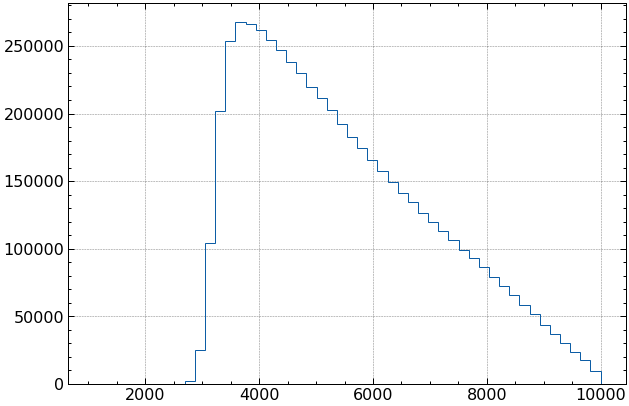

In [50]:
plt.figure(figsize=(10,7))
plt.hist(invM, histtype = 'step', bins = 50)
plt.show()

# 2) Missing Invariant Mass (MIM) 

In [51]:
def delP_sq(Eb, Emu, Pxm, Pym, Pzm):

    return np.abs(4*Eb**2 - 4*Eb*(Emu[:,0]+Emu[:,1]) + 2*(Emu[:,0]*Emu[:,1] - (Pxm[:,0]*Pxm[:,1] + Pym[:,0]*Pym[:,1] + Pzm[:,0]*Pzm[:,1])) + (Emu[:,0]**2 - (Pxm[:,0]**2 + Pym[:,0]**2 + Pzm[:,0]**2)) + (Emu[:,1]**2 - (Pxm[:,1]**2 + Pym[:,1]**2 + Pzm[:,1]**2)))


In [52]:
delp_sq2 = delP_sq(5000, Efm2, pxfm2, pyfm2, pzfm2) 

In [53]:
MIM2 = np.sqrt(delp_sq2)

In [54]:
df_results['MIM'] = MIM2

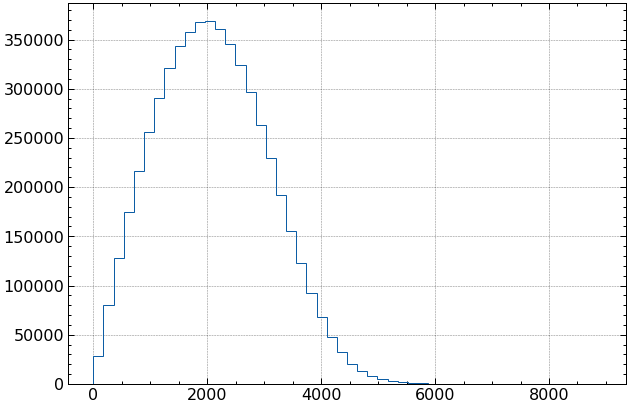

In [55]:
plt.figure(figsize=(10,7))
plt.hist(MIM2, histtype = 'step', bins = 50)
plt.show()

# 3) Eta_Distribution

In [56]:
fmeta2 = np.array(big_df5['fmeta'].tolist())
fmphi2 = np.array(big_df5['fmphi'].tolist())
fmpt2 = np.array(big_df5['fmpt'].tolist())

In [57]:
fmeta3 = big_df5['fmeta'].reset_index(drop=True)
df_results['fmeta'] = fmeta3

In [58]:
fmeta2

array([[ 3.06103992, -4.77353716],
       [ 4.12660694, -3.87286139],
       [ 3.07173657, -4.03496313],
       ...,
       [-2.86825705,  3.46157384],
       [-3.19457483,  5.34581566],
       [-3.11126685,  4.18786764]])

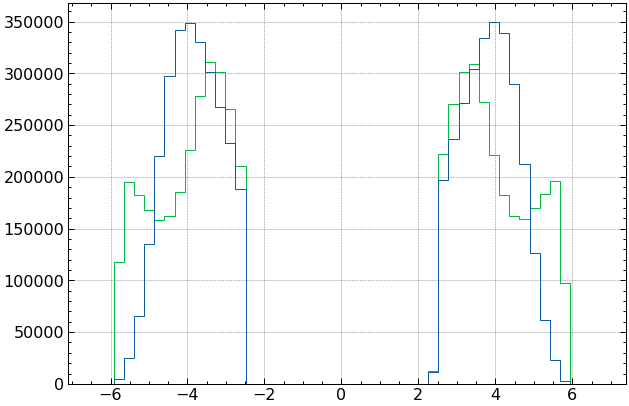

In [59]:
plt.figure(figsize=(10,7))
plt.hist(fmeta2, histtype = 'step', bins =50)
plt.show()

# 4) Delta_Eta

In [60]:
def deltaeta(eta):
    return np.abs((eta[:,0]) - (eta[:,1]))

In [61]:
deleta2 = deltaeta(fmeta2)

In [62]:
df_results['del_fmeta'] = deleta2

# Plotting

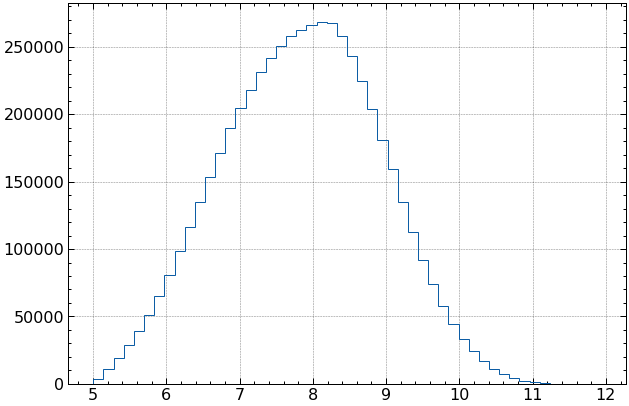

In [63]:
plt.figure(figsize=(10,7))
plt.hist(deleta2, histtype = 'step', bins =50)
plt.show()

# 5) Delta_PHI

In [64]:
def delphi(phi):
    del_phi = np.abs(phi[:, 0] - phi[:, 1])
    del_phi = np.where(del_phi > np.pi, 2*np.pi - del_phi, del_phi)
    return del_phi

In [65]:
# def delphi(phi):
#     del_phi = phi[:, 0] - phi[:, 1]
#     del_phi = np.where(del_phi >= -np.pi, del_phi, del_phi + 2 * np.pi)
#     del_phi = np.where(del_phi <= np.pi, del_phi, del_phi - 2 * np.pi)
    
#     return del_phi

In [66]:
delphi2 = delphi(fmphi2)

In [67]:
df_results['del_phi'] = delphi2

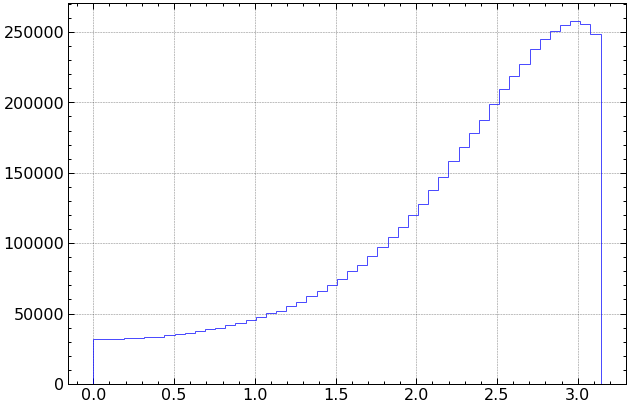

In [68]:
plt.figure(figsize=(10, 7))  
plt.hist(delphi2, bins=50, color='blue', alpha=0.7, histtype = 'step')
plt.show()

# 6) Delta_R

In [69]:
def delR(delPhi, delEta):
    return np.sqrt(delphi**2 + delEta**2)

In [70]:
delRfm = np.sqrt(delphi2**2 + deleta2**2)

In [71]:
df_results['delR_fm'] = delRfm

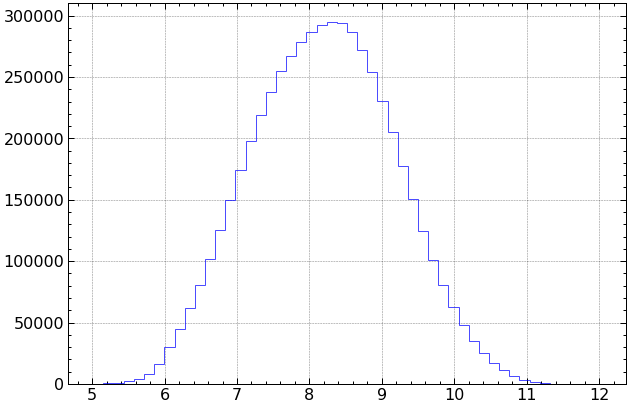

In [72]:
plt.figure(figsize=(10, 7))  
plt.hist(delRfm, bins=50, color='blue', alpha=0.7, histtype = 'step')
plt.show()

# 7) Energy of Forward Muons

In [73]:
Emin = np.min(Efm2, axis=1).reshape(-1,1)

In [74]:
Emax = np.max(Efm2, axis=1).reshape(-1,1)

In [75]:
totE = np.sum(Efm2, axis = 1).reshape(-1,1)

In [76]:
df_results['Emin_fm'] = Emin
df_results['Emax_fm'] = Emax
df_results['totE_fm'] = totE

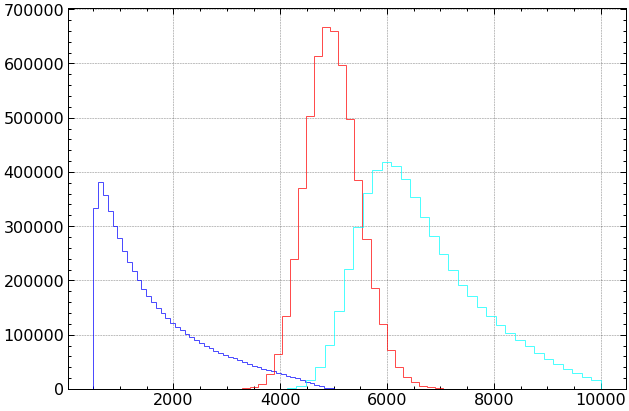

In [77]:
plt.figure(figsize=(10, 7))  
plt.hist(Emin, bins=50, color='blue', alpha=0.7, histtype = 'step')
plt.hist(Emax, bins=50, color='red', alpha=0.7, histtype = 'step')
plt.hist(totE, bins=50, color='cyan', alpha=0.7, histtype = 'step')
plt.show()

# 8) P_T of forward muons

In [78]:
def PTMu(px, py):
    return np.sqrt((px[:,0] + px[:,1])**2 +(py[:,0] + py[:,1])**2)

In [79]:
ptmu = PTMu(pxfm2, pyfm2)

In [80]:
df_results['PT_fm'] = ptmu

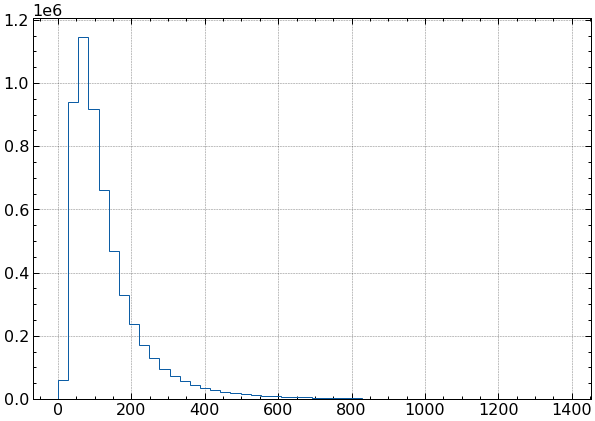

In [81]:
plt.figure(figsize=(10, 7))
plt.hist(ptmu, histtype = 'step', bins =50)
plt.show()

# 9) Missing Transverse Energy MET

In [82]:
pxj2 = big_df5['pxj'].tolist()
pyj2 = big_df5['pyj'].tolist()
pxe2 = big_df5['pxe'].tolist()
pye2 = big_df5['pye'].tolist()
pxm2 = big_df5['pxm'].tolist()
pym2 = big_df5['pym'].tolist()
pxp2 = big_df5['pxp'].tolist()
pyp2 = big_df5['pyp'].tolist()
pxfm3 = big_df5['pxfm'].tolist()
pyfm3 = big_df5['pyfm'].tolist()

In [83]:
tpx = ak.concatenate([pxj2, pxe2, pxm2, pxp2, pxfm2], axis=1)
tpy = ak.concatenate([pyj2, pye2, pym2, pyp2, pyfm2], axis=1)

In [84]:
sum_px = ak.sum(tpx, axis=1)
sum_py = ak.sum(tpy, axis=1)

In [85]:
MET = np.sqrt(sum_px**2 + sum_py**2)

In [86]:
df_results['MET'] = MET

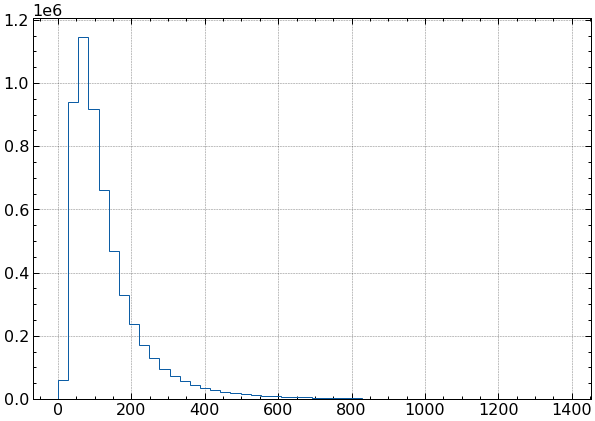

In [87]:
plt.figure(figsize=(10, 7))  
plt.hist(MET, bins=50, histtype ='step')
plt.show()

# Saving the data frames

In [88]:
# df_results.to_pickle('/home/chandrima/IDM_MuC/Results_new/IDM_BKG_higgs_dist.pkl')

In [89]:
# big_df5.to_pickle('/home/chandrima/IDM_MuC/Results_new/IDM_BKG_wpwm_param.pkl')

In [90]:
t2 = time.time()
print((t2-t1)/60)

3.9508249759674072


In [92]:
# 4. No leptons and Jets in Central region (Missing Energy)
big_df5 = big_df4[(big_df4['jet_num'] == 0) & (big_df4['e_num'] == 0) & (big_df4['m_num'] == 0)]
len(big_df5)

5552240